All imports.

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pprint
import collections

After selecting the dataset we need to create 2 artificial networks starting from the selected network. 
- The first Sshould be a random network employing an Erdos-Renyi model
- The second should be a scale-free network employing a Barabasi-Albert model

#TODO Add more info about those models.

Firstly the Erdos-Renyi generation

In [41]:
# THIS CODE IS COMENTED AS IT ONLY NEEDS TO RUN WHEN GENERATING A NEW VERSION OF THE NETWORK OR IF NO NETWORK WAS GENERATED YET
# # Parameters based on socfb-Reed98 dataset
# n = 962               # Number of nodes
# # Using the provided average degree of 39, the approximate number of edges:
# E = int(n * 39 / 2)   # Approximately 18759 edges

# # --- Create Erdős–Rényi Graph ---
# # For an undirected graph, the edge probability p is given by:
# #    p = (2E) / [n * (n - 1)]
# p = (2 * E) / (n * (n - 1))
# print(f"Erdős–Rényi model: n = {n}, E ≈ {E}, p = {p:.5f}")

# G_er = nx.erdos_renyi_graph(n, p)
# print(f"Created Erdős–Rényi graph with {G_er.number_of_nodes()} nodes and {G_er.number_of_edges()} edges.")

# # Save the Erdős–Rényi graph as a Matrix Market (.mtx) file in pattern format (undirected, unweighted)
# er_file = "networks/socfb-Reed98_ER.mtx"
# mmwrite(er_file, nx.to_scipy_sparse_array(G_er), field="pattern", symmetry="symmetric")
# print(f"Erdős–Rényi graph saved to '{er_file}'")

Secondly the Barabasi-Albert generation


In [42]:
# THIS CODE IS COMENTED AS IT ONLY NEEDS TO RUN WHEN GENERATING A NEW VERSION OF THE NETWORK OR IF NO NETWORK WAS GENERATED YET
# # Parameters based on socfb-Reed98 dataset
# n = 962               # Number of nodes
# # Using the provided average degree of 39, the approximate number of edges:
# E = int(n * 39 / 2)   # Approximately 18759 edges

# # --- Create Barabási–Albert Graph ---
# # In the BA model, each new node attaches to m existing nodes.
# # BA graphs have an average degree ≈ 2*m, so we choose m ≈ 20.
# m = 20
# G_ba = nx.barabasi_albert_graph(n, m)
# print(f"Created Barabási–Albert graph with {G_ba.number_of_nodes()} nodes and {G_ba.number_of_edges()} edges.")

# # Save the Barabási–Albert graph as a Matrix Market (.mtx) file in pattern format (undirected, unweighted)
# ba_file = "networks/socfb-Reed98_BA.mtx"
# mmwrite(ba_file, nx.to_scipy_sparse_array(G_ba), field="pattern", symmetry="symmetric")
# print(f"Barabási–Albert graph saved to '{ba_file}'")

Now to read and initialize the 3 networks for further analysis.

In [43]:
matrix_original = scipy.io.mmread("networks/socfb-Reed98.mtx")
matrix_ba = scipy.io.mmread("networks/socfb-Reed98_BA.mtx")
matrix_er = scipy.io.mmread("networks/socfb-Reed98_ER.mtx")

G_original = nx.from_scipy_sparse_array(matrix_original)
G = nx.from_scipy_sparse_array(matrix_ba)
G_ER = nx.from_scipy_sparse_array(matrix_er)

Now to gather some insights into the description of each of the networks

In [44]:
def describe_network(G, name):
    # Basic statistics
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()

    # Check if graph is directed
    is_directed = G.is_directed()

    # Check if graph is weighted
    is_weighted = any(data.get('weight', 1) != 1 for _, _, data in G.edges(data=True))

    # Density
    density = nx.density(G)

    print(f"\nNetwork Description for {name}:")
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    print(f"Directed: {is_directed}")
    print(f"Weighted: {is_weighted}")
    print(f"Network density: {density:.6f}\n")
    

describe_network(G_original, "Original Network")
describe_network(G, "BA Network")
describe_network(G_ER, "ER Network")


Network Description for Original Network:
Number of nodes: 962
Number of edges: 18812
Directed: False
Weighted: False
Network density: 0.040697


Network Description for BA Network:
Number of nodes: 962
Number of edges: 18840
Directed: False
Weighted: False
Network density: 0.040758


Network Description for ER Network:
Number of nodes: 962
Number of edges: 18589
Directed: False
Weighted: False
Network density: 0.040215




1. Original socfb-Reed98 Network
    * Nature of the Network:
        * Undirected & Unweighted: Each edge represents a mutual friendship between two individuals.
        * Social Network: The nodes correspond to people, and the links (edges) represent Facebook friendship relations.
    * Significance and Meaning:
        * Real-World Representation: This network is an authentic representation of social interactions on Facebook, where the structure reflects how individuals are connected within a community.
        * Community Structure & Clustering: Such networks often exhibit strong community structures and high clustering coefficients, indicating that friends of an individual are likely to be friends with each other.
        * Research Value: Analyzing this network helps in understanding social dynamics, influence spread, and network resilience.

2. Erdős–Rényi Synthetic Network (Random Model)
    * Nature of the Network:
        * Randomly Generated: Each pair of nodes is connected with a fixed probability p, independent of other pairs.
        * Statistical Properties: Typically, such networks have a Poisson-like degree distribution when the number of nodes is sufficiently large.
    * Significance and Meaning:
        * Null Model: The Erdős–Rényi model is often used as a baseline to compare with real networks, helping to highlight the impact of structured, non-random connectivity in social systems.
        * Lack of Community Structure: Since edges are added purely at random, there’s generally no inherent clustering or community formation—this contrast can reveal the role of social processes in real networks.
        * Theoretical Insights: It is useful for studying the emergence of connectivity and understanding properties like the threshold for the appearance of a giant component.

3. Barabási–Albert Synthetic Network (Scale-Free Model)
    * Nature of the Network:
        * Scale-Free: The degree distribution follows a power law, meaning that a few nodes (hubs) accumulate a large number of links while most nodes have relatively few connections.
        * Preferential Attachment: New nodes prefer to attach to already well-connected nodes, creating a “rich-get-richer” effect.

    * Significance and Meaning:
        * Modeling Real-World Networks: Many social, biological, and technological networks exhibit scale-free properties. This model helps to replicate and study such phenomena.
        * Emergence of Hubs: The existence of hubs explains why certain individuals or entities become highly influential or central in a network.
        * Robustness & Vulnerability: Scale-free networks are often robust against random failures (since most nodes are not highly connected) but may be vulnerable to targeted attacks on the hubs. This insight is vital for understanding network resilience.


### Utility code.

In [45]:
#---TODO: add your functions that you'll use in the notebook repeatedly, if any
  
def degree_summary_and_distribution(G: nx.Graph):
    # Degree of a Node: The number of edges connected to a node.
    # Interpretation: A node's degree represents how many friends a person has on facebook.

    #  - the lowest number of friends
    #  - the highest number of friends
    #  - the average number of friends
    degrees = [d for _, d in G.degree()]
    min_degree = np.min(degrees)
    max_degree = np.max(degrees)
    avg_degree = np.mean(degrees)

    print(f"Min Degree: {min_degree}")
    print(f"Max Degree: {max_degree}")
    print(f"Average Degree: {avg_degree}")

    # count how many times each degree appears
    degree_count = collections.Counter(degrees)
    # sort the info and have separate lists
    degree_values, node_counts = zip(*sorted(degree_count.items()))

    total = sum(node_counts)
    node_counts = [y / total for y in node_counts]

    # plot as a dot graph
    plt.figure(figsize=(7, 5))
    plt.scatter(degree_values, node_counts, alpha=0.6, edgecolors='k')
    plt.title("Degree Distribution (Dot Plot)")
    plt.xlabel("Degree")
    plt.ylabel("Number of Nodes")
    plt.grid(True)
    plt.show()


def connectivity(G: nx.Graph):
    is_connected = nx.is_connected(G)
    if not is_connected:
        # Connected Component: A group of nodes that are connected by paths.
        # The connected components can indicate if the network is one big cluster or composed of small ones.
        # Interpretation: Groups of friends isolated or interconnected.
        connected_components = list(nx.connected_components(G))
        num_connected_components = len(connected_components)
        largest_component_size = max(len(c) for c in connected_components)
        largest_cc = G.subgraph(max(connected_components, key=len))

    else:
        largest_component_size = len(G)
        largest_cc = G
        num_connected_components = 1

    print(f"The graph is connected: {is_connected}.")
    print(f"Number of Connected Components: {num_connected_components}.")
    print(f"Largest Component Size: {largest_component_size}.")

    # Diameter: the largest distance between any pair of nodes in the network.
    # Interpretation: the longest "friendship chain" connecting two users.
    diameter = nx.diameter(largest_cc) if nx.is_connected(largest_cc) else None
    
    print(f"Diameter: {diameter}")


def clustering_coefficient_and_degree_distribution_plot(G: nx.Graph):
    # Clustering Coefficient: Measures how tightly connected a node’s neighbors are (how likely it is for 2 nodes with a common neighbor to be linked).
    # Interpretation: How interconnected are on average the users. High clustering means high interaction between the friends of an user.
    avg_clustering = nx.average_clustering(G)
    
    print(f"Average Clustering Coefficient: {avg_clustering}")

    # Edge density: fraction of actual edges compared to the maximum possible edges.
    # Used to determine if the clustering coefficient is high or not.
    # NOTE: A low density means the network is sparse.
    edge_density = nx.density(G)

    print(f"Edge Density: {edge_density}")
    print(f"Clustering Coefficient is {"high" if avg_clustering > edge_density else "low"} compared to the edge density.")

    # plot clustering coefficient probability per degree
    degree_per_node = dict(G.degree())
    clustering_per_node = nx.clustering(G)

    # group clustering coefficients by degree
    clustering_by_degree = {}
    for node in G.nodes():
        k = degree_per_node[node]
        c = clustering_per_node[node]
        # if key already exists, make no change, else give a default
        clustering_by_degree.setdefault(k, [])
        clustering_by_degree[k].append(c)

    # compute average clustering coefficient per degree
    sorted_degrees = sorted(clustering_by_degree)
    avg_clustering_values_per_degree = [np.mean(clustering_by_degree[degree]) for degree in sorted_degrees]

    # Plot in log-log scale
    plt.figure(figsize=(6, 5))
    plt.scatter(sorted_degrees, avg_clustering_values_per_degree, alpha=0.6, edgecolors='k')
    plt.xlabel('Degree $k$')
    plt.ylabel('Clustering Coefficient $C(k)$')
    plt.title('Clustering Coefficient vs Degree')
    plt.grid(True)
    plt.show()


def betweenness_centrality_distribution(G: nx.Graph):
    # Betweenness Centrality: measures how often a node appears on shortest paths between other nodes.
    # Interpretation: People with high betweeness are the connection between two separate groups. They transfer information between the groups.
    
    betweenness = list(nx.betweenness_centrality(G).values())

    avg_betweenness = np.mean(betweenness)
    max_betweenness = np.max(betweenness)

    print(f"Average Betweenness Centrality: {avg_betweenness}")
    print(f"Max Betweenness Centrality: {max_betweenness}")

    # Plot distribution
    plt.figure()
    plt.hist(betweenness, bins="auto", edgecolor="black", linewidth=0.2)
    plt.title("Betweenness Centrality Distribution")
    plt.xlabel("Betweenness Centrality")
    plt.ylabel("Frequency")
    # to diminish the big spikes in the plot 
    plt.yscale("log")
    plt.show()


def shortest_path_length_and_plot(largest_cc: nx.Graph):
    # Shortest path: minimum number of edges required to travel from one node to another.
    # Interpretation: The degree of separation between two users measured in friendships. 
    # NOTE: compare with no. nodes? 
    
    avg_shortest_path_length = nx.average_shortest_path_length(largest_cc)

    print(f"Average Shortest Path Length: {avg_shortest_path_length}")

    # compute shortest paths between all node pairs
    lengths = dict(nx.all_pairs_shortest_path_length(largest_cc))

    # flatten distances into a list
    distance_counts = {}
    for source in lengths:
        for target in lengths[source]:
            if source != target:  # exclude self-loops
                d = lengths[source][target]
                distance_counts[d] = distance_counts.get(d, 0) + 1

    # normalize to get probability distribution
    total_pairs = sum(distance_counts.values())
    d_vals = sorted(distance_counts.keys())
    p_vals = [distance_counts[d] / total_pairs for d in d_vals]

    # plot probability distribution
    plt.figure(figsize=(7, 5))
    plt.plot(d_vals, p_vals, marker='o', alpha=0.6)
    plt.title("Shortest Path Length Distribution")
    plt.xlabel("Shortest Path Length $d$")
    plt.ylabel("Probability $p_d$")
    plt.axvline(x=np.average(d_vals, weights=p_vals), linestyle='--', color='gray', label='Average ⟨d⟩')
    plt.legend()
    plt.grid(True)
    plt.show()

In [46]:
def compute_and_display_degree_centrality(G, graph_name):
    """
    Compute and display the top 5 nodes by degree centrality.
    :param G: NetworkX graph
    :param graph_name: Name to label the output
    """
    print(f"\n=== {graph_name} ===")

    degree_centrality = nx.degree_centrality(G)
    
    dc_sorted = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

    print("Top 5 nodes by Degree Centrality:")
    for i in range(5):
        node, centrality = dc_sorted[i]
        print(f"Node {node}: {centrality:.4f}")


In [47]:
def compute_and_display_betweenness_centrality(G, graph_name):
    """
    Betweenness centrality measures how often a node lies on the shortest paths between others.
    High values indicate nodes that act as bridges in the network.
    """
    print(f"\n=== {graph_name} ===")

    betweenness = nx.betweenness_centrality(G)
    bc_sorted = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)

    print("Top 5 nodes by Betweenness Centrality:")
    for i in range(5):
        node, centrality = bc_sorted[i]
        print(f"Node {node}: {centrality:.4f}")

    return betweenness  


In [48]:
def compute_and_display_closeness_centrality(G, graph_name):
    """
    Closeness centrality shows how close a node is to all other nodes in the network.
    A high value means the node can quickly interact with others.
    """
    print(f"\n=== {graph_name} ===")

    closeness = nx.closeness_centrality(G)
    cc_sorted = sorted(closeness.items(), key=lambda item: item[1], reverse=True)

    print("Top 5 nodes by Closeness Centrality:")
    for i in range(5):
        node, centrality = cc_sorted[i]
        print(f"Node {node}: {centrality:.4f}")
    
    return closeness  


In [49]:
def compute_and_display_eigenvector_centrality(G, graph_name):
    """
    Eigenvector centrality reflects both the quantity and quality of a node’s connections.
    Nodes connected to other high-scoring nodes receive higher scores.
    """
    print(f"\n=== {graph_name} ===")
    
    try:
        eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
        ev_sorted = sorted(eigenvector.items(), key=lambda item: item[1], reverse=True)

        print("Top 5 nodes by Eigenvector Centrality:")
        for i in range(5):
            node, centrality = ev_sorted[i]
            print(f"Node {node}: {centrality:.4f}")

        return eigenvector  

    except nx.NetworkXError as e:
        print(f"⚠️ Could not compute eigenvector centrality for {graph_name}: {e}")
        return None


In [50]:
def plot_vs_degree(G, data, title, x_label, y_label):
    degree = nx.degree_centrality(G)

    x = [data[node] for node in G.nodes()]
    y = [degree[node] for node in G.nodes()]

    plt.figure(figsize=(7, 5))
    plt.scatter(x, y, alpha=0.6, edgecolors='k')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

# First Network - Original

### Network description

### Network Creation

### Network Properties

#### Connectivity

In [51]:
connectivity(G_original)

The graph is connected: True.
Number of Connected Components: 1.
Largest Component Size: 962.
Diameter: 6


#### Degree distribution

Min Degree: 1
Max Degree: 313
Average Degree: 39.11018711018711


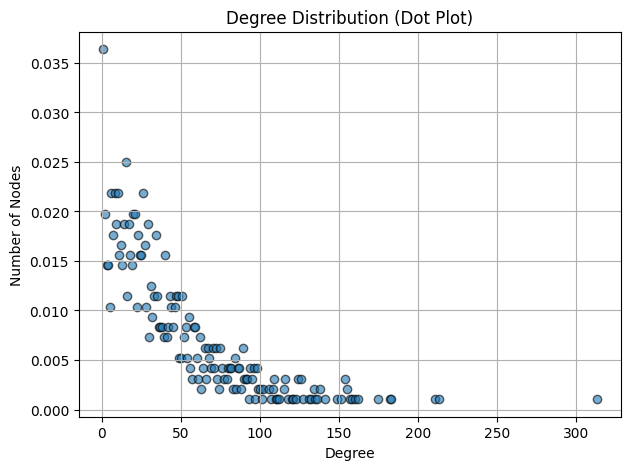

In [52]:
degree_summary_and_distribution(G_original)

- few nodes have high connections (100+): those represent the __hubs__  which play a critical role in connectivity
- the maximum degree is __much lager__ than the average
- __long-tail distribution__:
    - a characteristic of __social networks__ (which orts is)
    - suggests a potential __power-law__ or __scale-free__ structure

#### Betweeness Centrality Distribution

Average Betweenness Centrality: 0.0015223547709239695
Max Betweenness Centrality: 0.09098269628720329


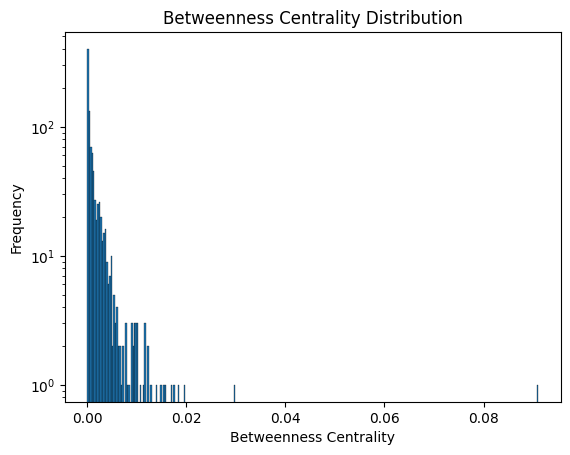

In [53]:
betweenness_centrality_distribution(G_original)

- most nodes have __very low betweenness centrality__ => they do not lie on many shortest paths between other nodes

#### Clustering Coefficient

Average Clustering Coefficient: 0.31836022727227925
Edge Density: 0.04069738513026754
Clustering Coefficient is high compared to the edge density.


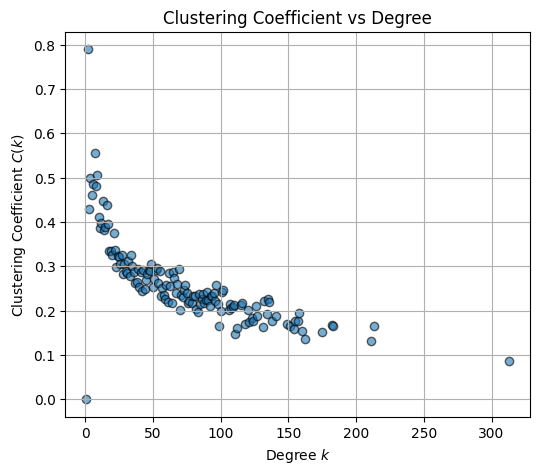

In [54]:
clustering_coefficient_and_degree_distribution_plot(G_original)

- low overall density and high clustering coefficient (≈0.318)
- as __degree increases__, the __clustering coefficient decreases__:
    - consistent with the __presence of hub nodes__ that link different parts of the network
    - __small-world network__: nodes form tightly knit clusters (with low degree), yet the overall network remains well-connected through a few highly linked hubs.

#### Average Shortest Path

Average Shortest Path Length: 2.461460580087011


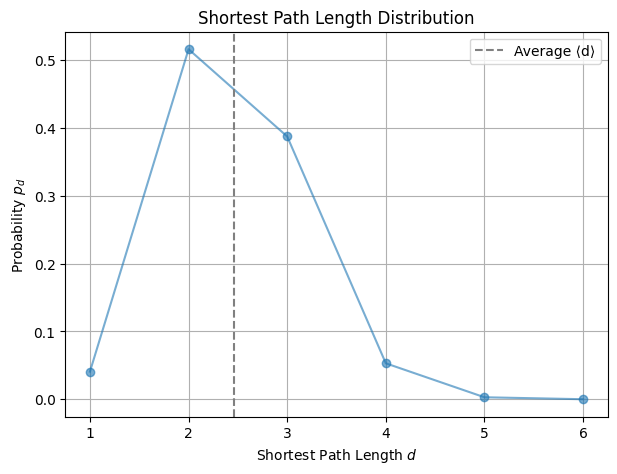

In [55]:
shortest_path_length_and_plot(G_original)

- average shortest path length(=2.46) indicates that any two nodes in the network can be reached from one another with __few steps__:
    - promotes the idea of __high clustering in the network connected by some hubs__

### Vizualization

### Important Nodes

Degree Centrality

In [56]:
compute_and_display_degree_centrality(G_original, "Original Network")


=== Original Network ===
Top 5 nodes by Degree Centrality:
Node 678: 0.3257
Node 872: 0.2216
Node 888: 0.2196
Node 645: 0.1904
Node 146: 0.1894


Betweeness Centrality


=== Original Network ===
Top 5 nodes by Betweenness Centrality:
Node 678: 0.0910
Node 888: 0.0296
Node 632: 0.0198
Node 829: 0.0184
Node 561: 0.0175


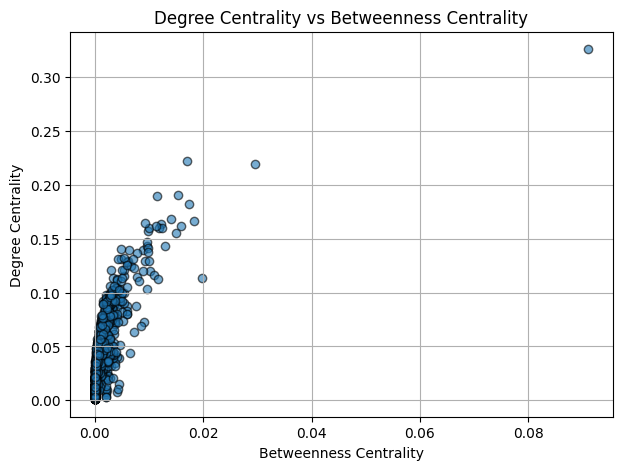

In [57]:
bc_original = compute_and_display_betweenness_centrality(G_original, "Original Network")
plot_vs_degree(G_original, bc_original, "Degree Centrality vs Betweenness Centrality", "Betweenness Centrality", "Degree Centrality")

- Most nodes have very low betweenness, even if their degree centrality is moderate.

- A few outliers have significantly higher betweenness — these are likely bridge nodes connecting communities.

- The correlation between degree and betweenness is weak.

__Interpretation__: While degree centrality captures how connected a node is, betweenness captures its role in facilitating communication. A node can be very connected (high degree) but still not lie on many shortest paths, and vice versa. This graph highlights that only a small number of nodes in the original network act as crucial connectors.

Closeness Centrality


=== Original Network ===
Top 5 nodes by Closeness Centrality:
Node 678: 0.5751
Node 888: 0.5339
Node 645: 0.5283
Node 872: 0.5277
Node 561: 0.5211


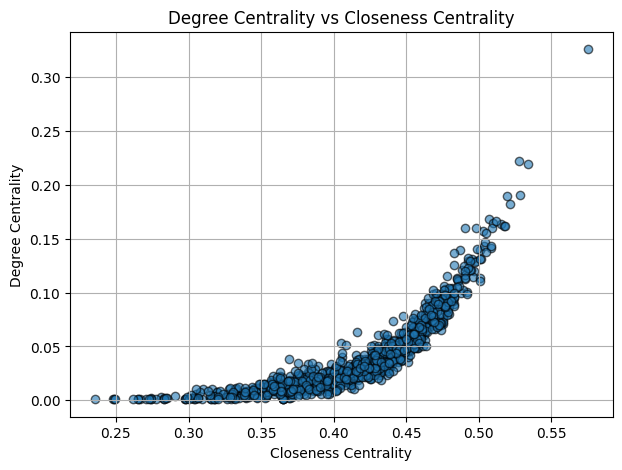

In [58]:
cc_original = compute_and_display_closeness_centrality(G_original, "Original Network")
plot_vs_degree(G_original, cc_original,"Degree Centrality vs Closeness Centrality", "Closeness Centrality", "Degree Centrality")


- There is a non-linear but strong correlation: as degree increases, closeness tends to increase too.

- Most nodes cluster at the lower range of both metrics, but a few stand out with high values.

__Interpretation__: Nodes with more direct connections tend to also be closer (in path length) to others in the network. However, it's not perfectly linear — closeness also depends on the structure around the node. Nodes with high closeness are well-positioned to efficiently reach the rest of the network.

Eigenvector Centrality


=== Original Network ===
Top 5 nodes by Eigenvector Centrality:
Node 678: 0.1460
Node 872: 0.1334
Node 146: 0.1156
Node 645: 0.1140
Node 888: 0.1138


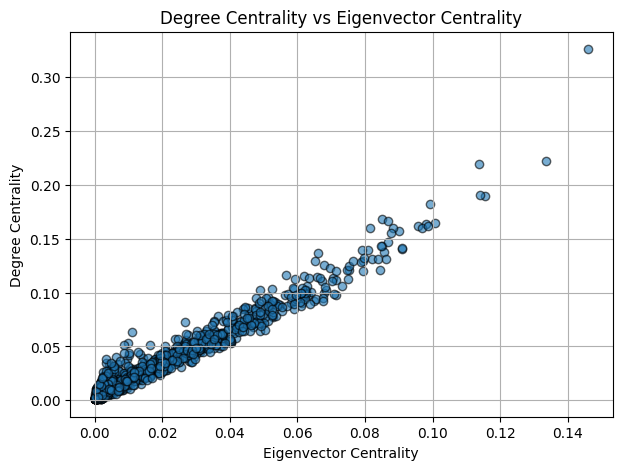

In [59]:
ec_original = compute_and_display_eigenvector_centrality(G_original, "Original Network")
if ec_original:
    plot_vs_degree(G_original, ec_original, "Degree Centrality vs Eigenvector Centrality", "Eigenvector Centrality", "Degree Centrality")


- There's a very strong linear-looking correlation between degree and eigenvector centrality.

- Nodes with high degree also have high influence — meaning they are likely connected to other important nodes.

__Interpretation__: In this network, popular nodes (by degree) are also influential (by eigenvector centrality), suggesting the presence of hub-like structures. This reflects a hierarchical or scale-free pattern where key nodes are tightly linked to other key nodes — a known characteristic of social networks.

# Second Network - Random Network ("Erdos-Renyi")

### Network description

### Network Creation

### Network Properties

#### Connectivity

#### Degree distribution

Min Degree: 22
Max Degree: 64
Average Degree: 38.646569646569645


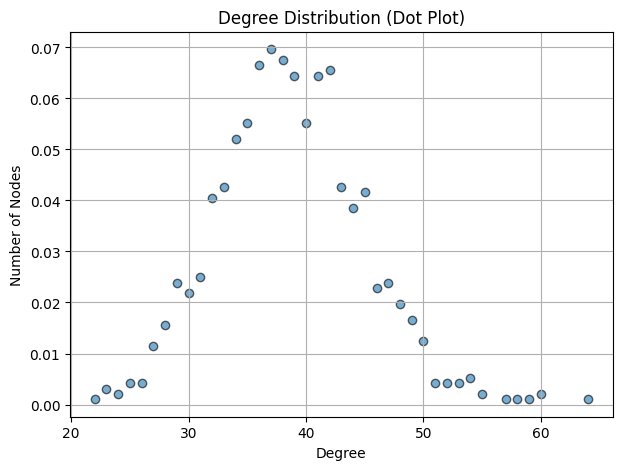

In [60]:
degree_summary_and_distribution(G_ER)

- random network typically shows a more homogeneous (often Poisson-like) degree distribution => __most nodes have average degree__
- unlike the original network's tailed distribution, the random network has __most nodes clustered around a similar degree__

#### Betweeness Centrality Distribution

Average Betweenness Centrality: 0.0012107410780667805
Max Betweenness Centrality: 0.0031928366967604975


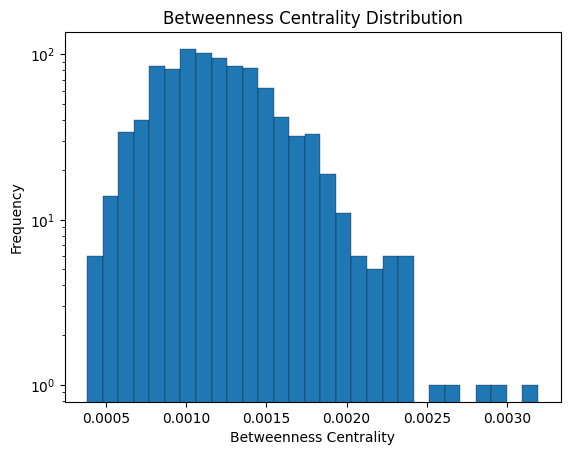

In [61]:
betweenness_centrality_distribution(G_ER)

- most nodes have __similar degree__ and connections are formed with __equal probability__:
    - the betweenness centrality is generally more __evenly distributed__ 
    - here aren’t many nodes that serve as hubs in the network; most nodes will have relatively low betweenness values compared to our network

#### Clustering Coefficient

Average Clustering Coefficient: 0.039595934121588384
Edge Density: 0.0402149528060038
Clustering Coefficient is low compared to the edge density.


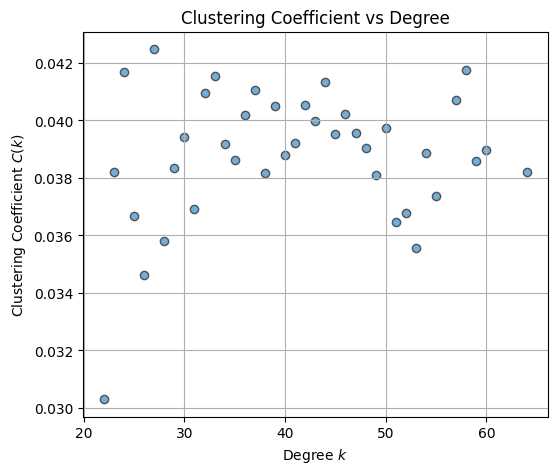

In [62]:
clustering_coefficient_and_degree_distribution_plot(G_ER)

- the clustering coefficient remains __relatively constant__ across all degree values (not the same relationship as in the real network)
- __low clustering values__:
    - typical for a random network, where clustering is low and does not depend much on degree
    - suggests that the strong local interconnections observed in the original network __are not replicated__ in the random network

#### Average Shortest Path

Average Shortest Path Length: 2.162311434944109


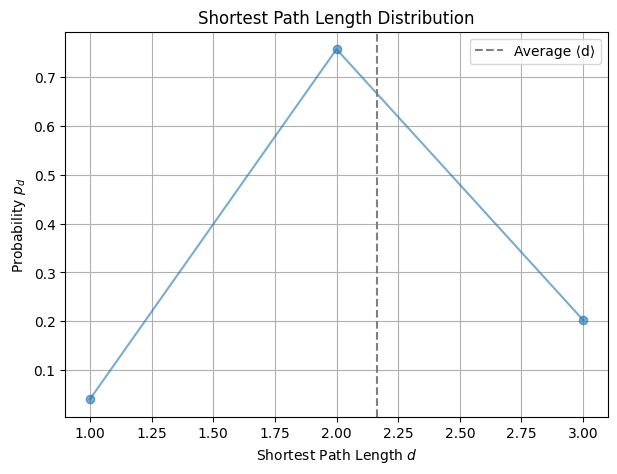

In [63]:
shortest_path_length_and_plot(G_ER)

- the distribution has __3 points__ => most node pairs are connected with a __similar number of hops__ (a characteristic of the uniform connectivity in random networks)
- both networks display __small-world properties__, meaning that most nodes can be reached within a few hops

### Vizualization

### Important Nodes

Degree Centrality

In [64]:
compute_and_display_degree_centrality(G_ER, "Random Network")


=== Random Network ===
Top 5 nodes by Degree Centrality:
Node 311: 0.0666
Node 190: 0.0624
Node 216: 0.0624
Node 26: 0.0614
Node 733: 0.0604


Betweeness Centrality


=== Random Network ===
Top 5 nodes by Betweenness Centrality:
Node 311: 0.0032
Node 190: 0.0029
Node 216: 0.0028
Node 26: 0.0027
Node 733: 0.0026


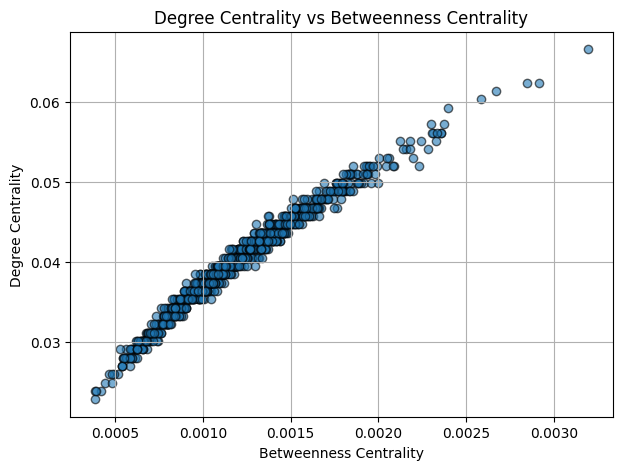

In [65]:
bc_er = compute_and_display_betweenness_centrality(G_ER, "Random Network")
plot_vs_degree(G_ER, bc_er, "Degree Centrality vs Betweenness Centrality", "Betweenness Centrality", "Degree Centrality")

- A few nodes have both high degree and high betweenness.

- Most nodes cluster around low values.

- The outliers are clear hubs — created intentionally by the preferential attachment model.

__Interpretation__: The BA model naturally generates hub nodes, which are not only well-connected but also serve as bridges between parts of the network. These hubs dominate both degree and betweenness, reinforcing the scale-free nature of the network.

Closeness Centrality


=== Random Network ===
Top 5 nodes by Closeness Centrality:
Node 311: 0.5003
Node 190: 0.4936
Node 216: 0.4931
Node 209: 0.4918
Node 727: 0.4918


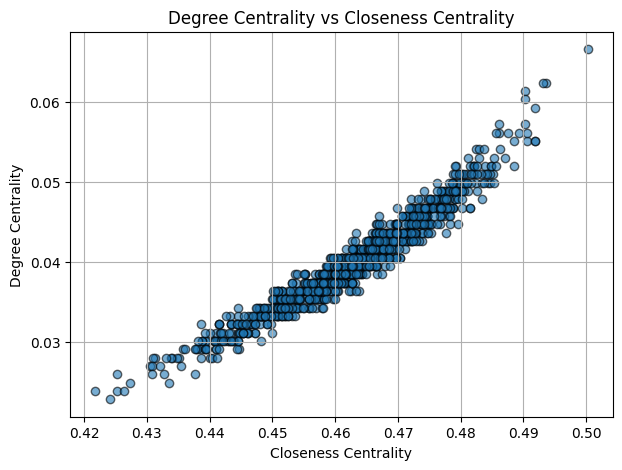

In [66]:
cc_er = compute_and_display_closeness_centrality(G_ER, "Random Network")
plot_vs_degree(G_ER, cc_er, "Degree Centrality vs Closeness Centrality", "Closeness Centrality", "Degree Centrality")

- Strong but slightly curved correlation.

- Higher-degree nodes tend to also have higher closeness, though not as clean as in the original.

__Interpretation__: Nodes with high degree are usually central and can reach others quickly — but in BA networks, some peripheral nodes may be far from others due to how the network grows. Still, hubs ensure relatively short path lengths overall.

Eigenvector Centrality


=== Original Network ===
Top 5 nodes by Eigenvector Centrality:
Node 311: 0.0537
Node 216: 0.0499
Node 209: 0.0494
Node 26: 0.0493
Node 190: 0.0489


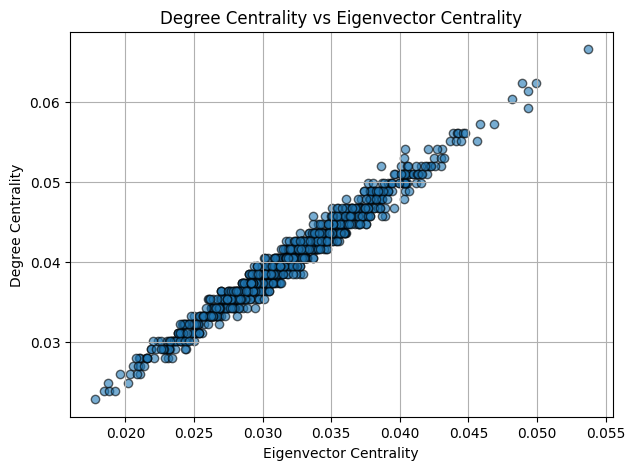

In [67]:
ec_er = compute_and_display_eigenvector_centrality(G_ER, "Original Network")
if ec_er:
    plot_vs_degree(G_ER, ec_er, "Degree Centrality vs Eigenvector Centrality", "Eigenvector Centrality", "Degree Centrality")


- Strong correlation, with high-degree nodes also having high eigenvector values.

- Few dominant peaks — again showing influential hubs.

__Interpretation__: In BA networks, hubs are influential and connected to other influential nodes. Eigenvector centrality reinforces that hierarchy, and shows how few nodes concentrate influence.

# Third Network - Scale-Free Network ("Barabasi-Albert")

### Network description


### Network Creation

### Network Properties

#### Connectivity

#### Degree distribution

Min Degree: 20
Max Degree: 237
Average Degree: 39.16839916839917


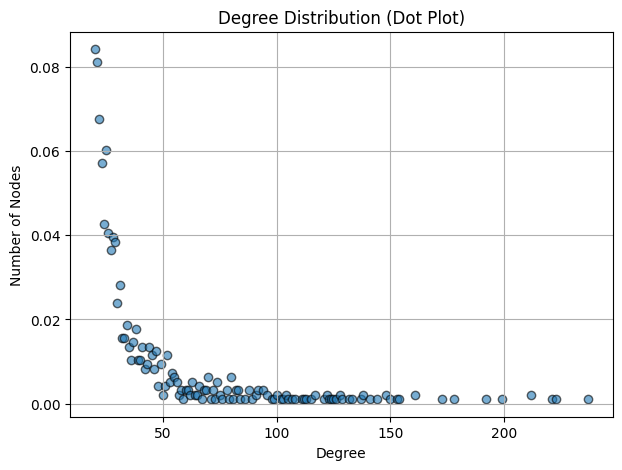

In [68]:
degree_summary_and_distribution(G)

- this distribution exhibits all the proprieties from the original network: __hubs__, __max value much larger__ and __long-tail distribution__ (specific to scale-free)

#### Betweeness Centrality Distribution

Average Betweenness Centrality: 0.0012058937689790967
Max Betweenness Centrality: 0.026474849080663544


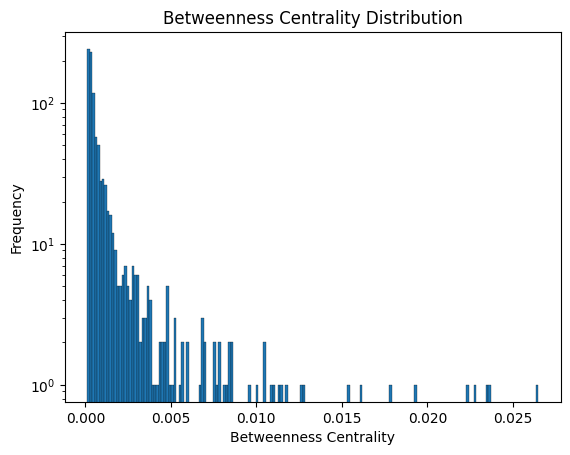

In [69]:
betweenness_centrality_distribution(G)

- again, same properties, although we __lack some of the outliers__ found in the real network, but the distribution remains __skewed__

#### Clustering Coefficient

Average Clustering Coefficient: 0.096800048611372
Edge Density: 0.040757959592506936
Clustering Coefficient is high compared to the edge density.


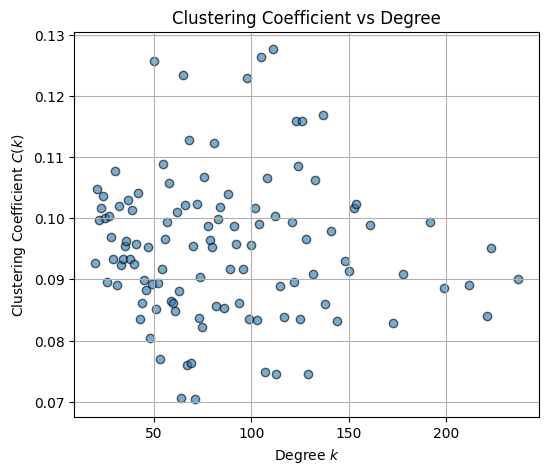

In [70]:
clustering_coefficient_and_degree_distribution_plot(G)

- shows a __mild negative trend__, but nowhere near the drastically of the real network
- the clustering coef. is much smaller, indicating that the __clusters formed withing are much smaller__ and the __hubs connect less clusters__

#### Average Shortest Path

Average Shortest Path Length: 2.1576580182199327


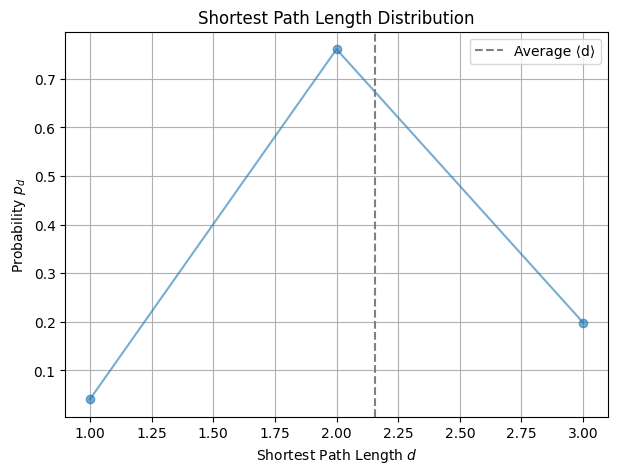

In [71]:
shortest_path_length_and_plot(G)

- being a __bit more uniform when it comes to clustering__, it is reflected in distances that __do not pass the value of 3.00__, unlike the original network => much easier to get from one node to another

### Vizualization

### Important Nodes

Degree Centrality

In [72]:
compute_and_display_degree_centrality(G, "Scale-Free Network")


=== Scale-Free Network ===
Top 5 nodes by Degree Centrality:
Node 21: 0.2466
Node 0: 0.2320
Node 23: 0.2300
Node 22: 0.2206
Node 24: 0.2206


Betweeness Centrality


=== Scale-Free Network ===
Top 5 nodes by Betweenness Centrality:
Node 21: 0.0265
Node 0: 0.0237
Node 23: 0.0235
Node 22: 0.0228
Node 24: 0.0223


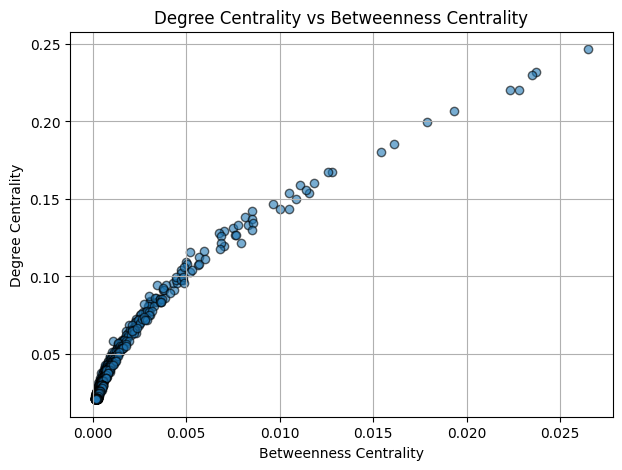

In [73]:
bc_ba = compute_and_display_betweenness_centrality(G, "Scale-Free Network")
plot_vs_degree(G, bc_ba, "Degree Centrality vs Betweenness Centrality", "Betweenness Centrality", "Degree Centrality")

- Scatter is much more even.

- Weak correlation between degree and betweenness — few clear hubs.

- Betweenness values are generally lower than in the other models.

__Interpretation__: The ER model connects nodes randomly, so there’s no natural tendency for hubs or bridges to emerge. Betweenness is more uniformly distributed — no node clearly dominates.

Closeness Centrality


=== Scale-Free Network ===
Top 5 nodes by Closeness Centrality:
Node 21: 0.5703
Node 0: 0.5656
Node 23: 0.5650
Node 22: 0.5620
Node 24: 0.5620


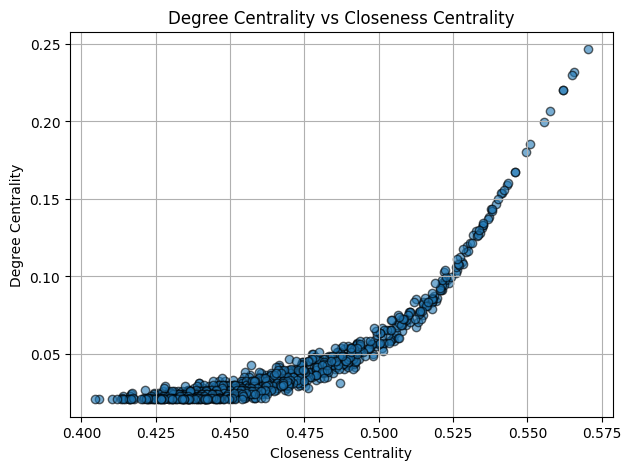

In [74]:
cc_ba = compute_and_display_closeness_centrality(G, "Scale-Free Network")
plot_vs_degree(G, cc_ba, "Degree Centrality vs Closeness Centrality", "Closeness Centrality", "Degree Centrality")

- Correlation exists but it's less steep or structured.

- Degree increases lead to some improvement in closeness, but not as predictably.

__Interpretation__: In ER networks, random connections mean a node’s closeness isn't guaranteed by degree alone. The lack of structure leads to more diffuse connectivity.

Eigenvector Centrality


=== Scale-Free Network ===
Top 5 nodes by Eigenvector Centrality:
Node 21: 0.1541
Node 0: 0.1498
Node 23: 0.1408
Node 24: 0.1389
Node 22: 0.1375


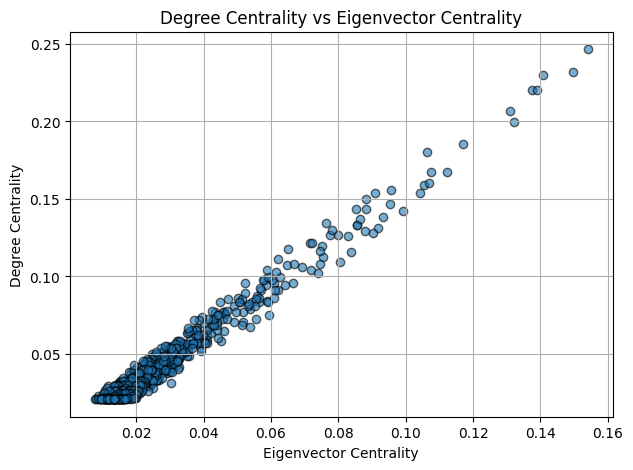

In [75]:
ec_ba = compute_and_display_eigenvector_centrality(G, "Scale-Free Network")
if ec_ba:
    plot_vs_degree(G, ec_ba, "Degree Centrality vs Eigenvector Centrality", "Eigenvector Centrality", "Degree Centrality")


- Very mild correlation.

- Eigenvector scores stay relatively low overall.

__Interpretation__: Since nodes connect randomly, influential patterns don’t emerge. No node is consistently connected to others with high degree or influence. This leads to low and flat eigenvector scores across the board — the ER model is egalitarian but inefficient in terms of influence.